# Simple Linear Regression

### 1. Import Required Libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 2. Load the Dataset

In [86]:
data=pd.read_csv('height-weight.csv')
data.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


### 3. Explore the Dataset (EDA)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [88]:
data.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [89]:
data.isnull().sum()

Weight    0
Height    0
dtype: int64

In [90]:
data.duplicated().sum()

np.int64(1)

### 4. Visualize the Dataset

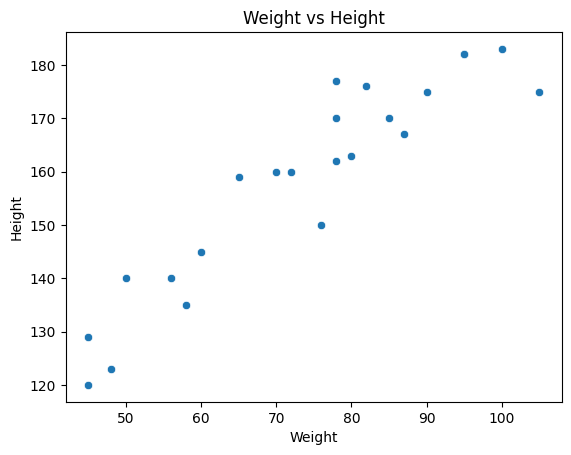

In [91]:
sns.scatterplot(x='Weight', y='Height', data=data)
plt.title('Weight vs Height')
plt.show()

In [92]:
#correlation
data.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


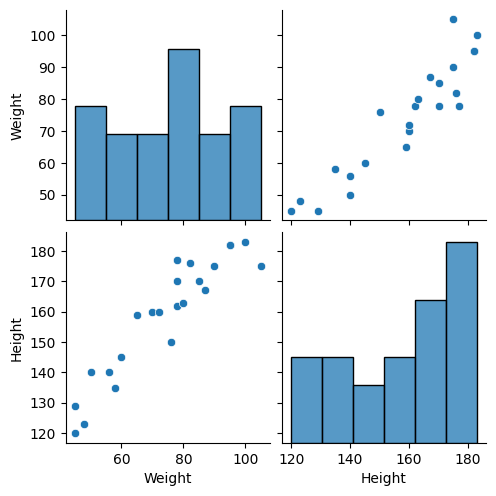

In [93]:
sns.pairplot(data)
plt.show()

### 5. Define Features and Target

In [94]:
X=data[['Weight']]  #independent feature
Y=data['Height']    #dependent feature

### 6. Split the Data (Train/Test Split)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 7. Standardize the Data (Important if X has different scales)

In [96]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### 8. Train the Model

In [97]:
model=LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [98]:
print("Model Coefficient (Slope):", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficient (Slope): [17.03440872]
Model Intercept: 157.5


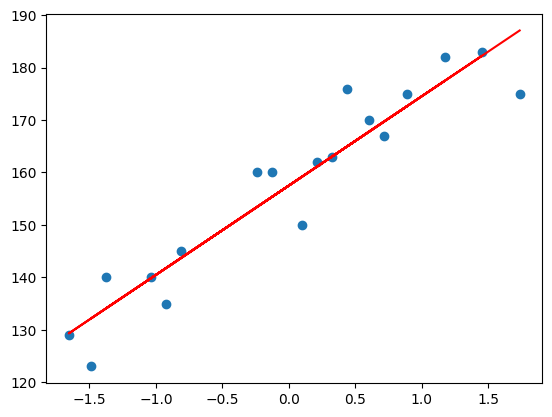

In [99]:
#plot training data and regression (best fit) line
plt.scatter(X_train,y_train)
plt.plot(X_train, model.predict(X_train), color='red')
plt.show()

### 9. Make Predictions

In [100]:
y_pred=model.predict(X_test)

In [101]:
print(y_pred)

[161.08467086 161.08467086 129.3041561  177.45645118 148.56507414]


10. Evaluate the Model

R square Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


A**djusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [102]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adj_r2=1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("mse:",mse)
print("mae:",mae)
print("rmse:",rmse)
print("r2:",r2)
print("adjusted r2:",adj_r2)

mse: 109.77592599051664
mae: 9.822657814519232
rmse: 10.477400726827081
r2: 0.776986986042344
adjusted r2: 0.7026493147231252


### 11. Visualize the Regression Line

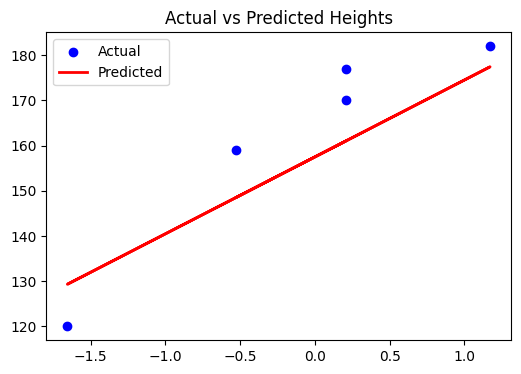

In [103]:
plt.figure(figsize=(6,4))
plt.scatter(X_test,y_test,color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Heights')
plt.legend()
plt.show()

In [108]:
#Testig for new data

# y_new_pred=model.predict(([[72]]))
# print(y_new_pred)

y_new_pred=model.predict(scaler.transform([[72]]))
print(y_new_pred)

print(model.predict(scaler.transform([[80]])))


[155.30639545]
[163.01076266]


c:\Users\285128\OneDrive - UST\Upskill\Datascience\ML\ML_Practice\pvenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\285128\OneDrive - UST\Upskill\Datascience\ML\ML_Practice\pvenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## OLS Linear Regression

In [134]:
import statsmodels.api as sm

In [135]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

ols_model=sm.OLS(y_train,X_train_scaled).fit()


In [136]:
prediction=ols_model.predict(X_test_scaled)
print(prediction)


[  3.58467086   3.58467086 -28.1958439   19.95645118  -8.93492586]


In [137]:
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Sat, 08 Nov 2025   Prob (F-statistic):                       0.661
Time:                        19:24:55   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

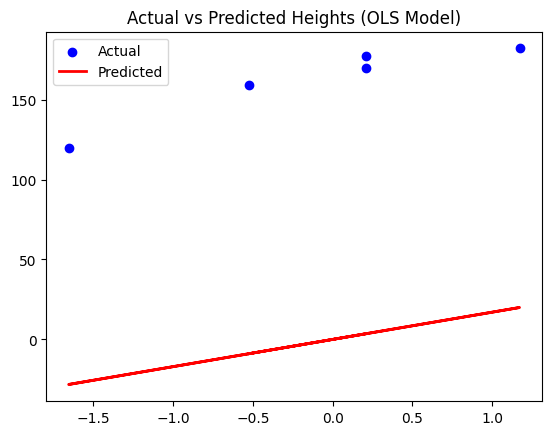

In [138]:
plt.scatter(X_test,y_test,color='blue', label='Actual')
plt.plot(X_test, prediction, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Heights (OLS Model)')
plt.legend()
plt.show()

Linear Regression automatically fits intercept by default
in OLS we need to explicitly add the intercept or constant using 
sm.add_constant(X)

In [139]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Step 1. Scale train and test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [140]:
# Step 2. Add constant to both
X_train_const = sm.add_constant(X_train_scaled)
X_test_const = sm.add_constant(X_test_scaled)

In [141]:
# Step 3. Fit model using train data with constant
ols_model = sm.OLS(y_train, X_train_const).fit()

In [142]:

# Step 4. Predict using test data with constant
y_pred_ols = ols_model.predict(X_test_const)

print(y_pred_ols)

[161.08467086 161.08467086 129.3041561  177.45645118 148.56507414]


In [143]:
print(X_train_const.shape)
print(X_test_const.shape)
print(ols_model.params.shape)

(18, 2)
(5, 2)
(2,)


In [145]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     133.6
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           3.53e-09
Time:                        19:25:37   Log-Likelihood:                -57.473
No. Observations:                  18   AIC:                             118.9
Df Residuals:                      16   BIC:                             120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.5000      1.474    106.879      0.0

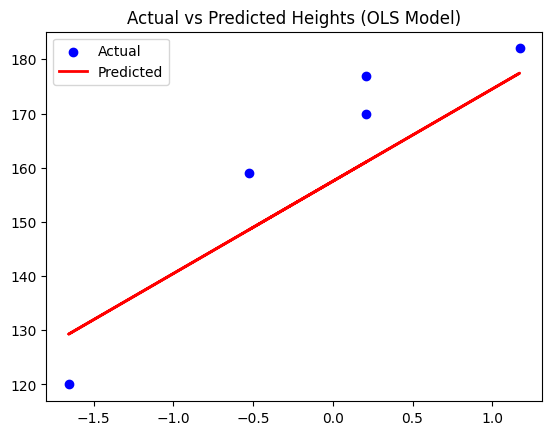

In [144]:
plt.scatter(X_test,y_test,color='blue', label='Actual')
plt.plot(X_test, y_pred_ols, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Heights (OLS Model)')
plt.legend()
plt.show()

In [159]:
# # Suppose you want to predict for a new X = 72
# X_new = [[72]]

# # 1️⃣ Scale using the same scaler (do NOT fit again)
# X_new_scaled = scaler.transform(X_new)

# # 2️⃣ Add constant (since OLS expects it)
# X_new_const = sm.add_constant(X_new_scaled)

# # 3️⃣ Predict using trained OLS model
# y_new_pred_ols = ols_model.predict(X_new_const)

# print("Predicted value for X=72:", y_new_pred_ols[0])

In [158]:
X_new = [[72], [80], [95]]
X_new_scaled = scaler.transform(X_new)
X_new_const = sm.add_constant(X_new_scaled)
y_new_pred_ols = ols_model.predict(X_new_const)

for x, y_pred in zip(X_new, y_new_pred_ols):
    print(f"X = {x[0]} → Predicted Y = {y_pred:.2f}")

X = 72 → Predicted Y = 1383.98
X = 80 → Predicted Y = 1520.25
X = 95 → Predicted Y = 1775.77
